## Crash Injury Prediction

#### About the dataset

This dataset contains crash information from the last five years to the current date.It includes details about location,road,weather,light condition,vehicles,injuries etc. The goal is to build a machine learning model to predict whether there is a injury due to a crash.

#### Features

Location-Related Features
* location_description : description of the crash location
* lat2 : latiitude of the location
* lon2 : longitude of the location

Vehicle-Related Features
* vehicle1,vehicle2,vehicle3,vehicle4,vehicle5 : type of the vehicle get crashed
* numpassengers : number of passengers in vehicle

Road & Traffic Conditions
* rdfeatures : features of the road where crash occured   
* rdcharacter : character of the road   
* rdclass : class of the road    
* rdsurface :  type of road surface    
* rdcondition : condition of road      
* rdconfigur : configuration of road     
* trafcontrl : type of traffic control present
* numpedestrians : number of pedestrians
* workarea : type of work area

Weather & Light Conditions
* weather : weather at the time of crash
* lightcond : light condition at the time of crash

Time & Date-Related Features
* month : month when crash occured
* year : year when crash occured
* crash_date : date when crash occured

Injury Related Features
* contributing_factor : factor contributing to crash
* injuries : whether there is a injury due to crash(yes/no)

#### Importing the necessary libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset

In [14]:
crash_df = pd.read_csv("cpd-crash-incidents.csv",sep=";")

In [15]:
crash_df.head()

tamainid                      location_description              rdfeature  \
0     43770      20 FEET FROM SR 1615 (HIGH HOUSE RD)     NO SPECIAL FEATURE   
1     43771       37 FEET FROM PVA 1387 SE MAYNARD RD     NO SPECIAL FEATURE   
2     43773          NEAR .25 MILES E OF E NC 540 HWY     NO SPECIAL FEATURE   
3     43774                   200 FEET FROM NC 55 HWY     NO SPECIAL FEATURE   
4     43780  431 FEET FROM SR 1300 (KILDAIRE FARM RD)  FOUR-WAY INTERSECTION   

      rdcharacter                rdclass  \
0  STRAIGHT,LEVEL  STATE SECONDARY ROUTE   
1  STRAIGHT,LEVEL  PUBLIC VEHICULAR AREA   
2  STRAIGHT,LEVEL               NC ROUTE   
3  STRAIGHT,LEVEL               NC ROUTE   
4  STRAIGHT,LEVEL  STATE SECONDARY ROUTE   

                                rdconfigur         rdsurface rdcondition  \
0       TWO-WAY,DIVIDED,UNPROTECTED MEDIAN    SMOOTH ASPHALT         DRY   
1                      TWO-WAY,NOT DIVIDED    COARSE ASPHALT         DRY   
2  TWO-WAY,DIVIDED,POSITIVE MEDIAN BARRIER  GROOVED CONCRETE         DRY   
3       TWO-WAY,DIVIDED,UNPROTECTED MEDIAN    SMOOTH ASPHALT         DRY   
4       TWO-WAY,DIVIDED,UNPROTECTED MEDIAN    COARSE ASPHALT         DRY   

                lightcond weather  ...     ta_date     ta_time  \
0                DAYLIGHT   CLEAR  ...  2020-02-10  9:47:14 AM   
1                DAYLIGHT   CLEAR  ...  2020-02-10  1:02:13 PM   
2                DAYLIGHT   CLEAR  ...  2020-02-10  7:45:59 AM   
3                DAYLIGHT   CLEAR  ...  2020-02-10  1:50:24 PM   
4  DARK - LIGHTED ROADWAY   CLEAR  ...  2020-02-09  6:39:57 PM   

                  crash_date                geo_location  year fatalities  \
0  2020-02-10T14:47:14+00:00                         NaN  2020         No   
1  2020-02-10T18:02:13+00:00                         NaN  2020         No   
2  2020-02-10T12:45:59+00:00                         NaN  2020         No   
3  2020-02-10T18:50:24+00:00  35.845812358, -78.89077863  2020         No   
4  2020-02-09T23:39:57+00:00                         NaN  2020         No   

  injuries  month  contributing_factor                 vehicle_type  
0       No      2            NONE,NONE  SPORT UTILITY,PASSENGER CAR  
1       No      2            NONE,NONE  PASSENGER CAR,PASSENGER CAR  
2       No      2            NONE,NONE                   PICKUP,VAN  
3       No      2            NONE,NONE  PASSENGER CAR,SPORT UTILITY  
4       No      2            NONE,NONE            SPORT UTILITY,VAN  

[5 rows x 42 columns]

#### Analysing the dataset

In [17]:
print("shape of dataset : ",crash_df.shape)

shape of dataset :  (20724, 42)


The dataset have 20724 rows and 42 columns

In [19]:
#display column names
crash_df.columns

Index(['tamainid', 'location_description', 'rdfeature', 'rdcharacter',
       'rdclass', 'rdconfigur', 'rdsurface', 'rdcondition', 'lightcond',
       'weather', 'trafcontrl', 'lat', 'lon', 'lon2', 'lat2', 'tract', 'zone',
       'fatality', 'possblinj', 'numpassengers', 'numpedestrians',
       'contrcir1_desc', 'contrcir2_desc', 'contrcir3_desc', 'contrcir4_desc',
       'vehicle1', 'vehicle2', 'vehicle3', 'vehicle4', 'vehicle5', 'workarea',
       'records', 'ta_date', 'ta_time', 'crash_date', 'geo_location', 'year',
       'fatalities', 'injuries', 'month', 'contributing_factor',
       'vehicle_type'],
      dtype='object')

In [20]:
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20724 entries, 0 to 20723
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tamainid              20724 non-null  int64  
 1   location_description  20719 non-null  object 
 2   rdfeature             20212 non-null  object 
 3   rdcharacter           20219 non-null  object 
 4   rdclass               20222 non-null  object 
 5   rdconfigur            20150 non-null  object 
 6   rdsurface             20233 non-null  object 
 7   rdcondition           20233 non-null  object 
 8   lightcond             20249 non-null  object 
 9   weather               20247 non-null  object 
 10  trafcontrl            20198 non-null  object 
 11  lat                   8888 non-null   float64
 12  lon                   8888 non-null   float64
 13  lon2                  20220 non-null  float64
 14  lat2                  20199 non-null  float64
 15  tract              

In [21]:
#statistical analysis of data
crash_df.describe().transpose()

count          mean           std           min  \
tamainid        20724.0  54090.961687  6.420033e+03  4.324900e+04   
lat              8888.0     35.778530  4.575991e-02  3.555265e+01   
lon              8888.0    -78.795930  6.588438e-02 -7.922919e+01   
lon2            20220.0 -18517.614056  1.117817e+06 -7.887380e+07   
lat2            20199.0   3757.838057  3.571278e+05 -7.885800e+01   
fatality        20724.0      0.001544  4.047598e-02  0.000000e+00   
possblinj       20724.0      0.183604  5.452275e-01  0.000000e+00   
numpassengers    6319.0      1.773540  2.289955e+00  1.000000e+00   
numpedestrians    129.0      1.031008  1.740144e-01  1.000000e+00   
records         20724.0  10362.500000  5.982648e+03  1.000000e+00   
year            20724.0   2022.193206  1.417220e+00  2.020000e+03   
month           20724.0      6.587001  3.541975e+00  1.000000e+00   

                         25%           50%           75%           max  
tamainid        48460.750000  53643.500000  59824.250000  6.501000e+04  
lat                35.754908     35.775377     35.798769  3.600833e+01  
lon               -78.825002    -78.783583    -78.763748 -7.829417e+01  
lon2              -78.819509    -78.783167    -78.763500  7.897055e+01  
lat2               35.753647     35.772740     35.796926  3.581378e+07  
fatality            0.000000      0.000000      0.000000  2.000000e+00  
possblinj           0.000000      0.000000      0.000000  1.400000e+01  
numpassengers       1.000000      1.000000      2.000000  6.300000e+01  
numpedestrians      1.000000      1.000000      1.000000  2.000000e+00  
records          5181.750000  10362.500000  15543.250000  2.072400e+04  
year             2021.000000   2022.000000   2023.000000  2.025000e+03  
month               3.000000      7.000000     10.000000  1.200000e+01

### Data Preprocessing

#### Data Cleaning

##### identifying and filling missing values

In [25]:
crash_df.isnull().sum()

tamainid                    0
location_description        5
rdfeature                 512
rdcharacter               505
rdclass                   502
rdconfigur                574
rdsurface                 491
rdcondition               491
lightcond                 475
weather                   477
trafcontrl                526
lat                     11836
lon                     11836
lon2                      504
lat2                      525
tract                   15343
zone                    11644
fatality                    0
possblinj                   0
numpassengers           14405
numpedestrians          20595
contrcir1_desc           3060
contrcir2_desc          20696
contrcir3_desc            565
contrcir4_desc          20662
vehicle1                  609
vehicle2                 3615
vehicle3                19726
vehicle4                20579
vehicle5                20697
workarea                  476
records                     0
ta_date                     0
ta_time   

##### Drop unnecessary columns 

In [27]:
#drop the columns that are not neccessary for prediction
unnecessary_columns = ['tamainid','geo_location','location_description','possblinj','fatalities','fatality','lon','lat']
crash_df = crash_df.drop(columns=[col for col in unnecessary_columns if col in crash_df.columns])

In [28]:
#identify numerical and categorical features
num_features = crash_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = crash_df.select_dtypes(include=['object']).columns.tolist()

In [29]:
# For numerical features, fill missing values with the mean
for feature in num_features:
    crash_df[feature].fillna(crash_df[feature].mean(), inplace=True)

# For categorical features, fill missing values with the mode
for feature in cat_features:
    crash_df[feature].fillna(crash_df[feature].mode()[0], inplace=True)

In [30]:
crash_df.isnull().sum()

rdfeature              0
rdcharacter            0
rdclass                0
rdconfigur             0
rdsurface              0
rdcondition            0
lightcond              0
weather                0
trafcontrl             0
lon2                   0
lat2                   0
tract                  0
zone                   0
numpassengers          0
numpedestrians         0
contrcir1_desc         0
contrcir2_desc         0
contrcir3_desc         0
contrcir4_desc         0
vehicle1               0
vehicle2               0
vehicle3               0
vehicle4               0
vehicle5               0
workarea               0
records                0
ta_date                0
ta_time                0
crash_date             0
year                   0
injuries               0
month                  0
contributing_factor    0
vehicle_type           0
dtype: int64

##### Converting categorical Target column into numerical column

In [32]:
crash_df['injuries'] = crash_df["injuries"].map({"Yes":1 , "No": 0})

##### Unique values of categorical column

In [34]:
for feature in cat_features:
    print(f"unique values of {feature} : ")
    print("------------------------------------")
    print(crash_df[feature].unique())
    print("\n")

unique values of rdfeature : 
------------------------------------
['NO SPECIAL FEATURE' 'FOUR-WAY INTERSECTION' 'DRIVEWAY, PUBLIC'
 'RELATED TO INTERSECTION' 'DRIVEWAY, PRIVATE' 'T-INTERSECTION' 'BRIDGE'
 'OFF-RAMP TERMINAL ON CROSSROAD' 'MERGE LANE BETWEEN ON AND OFF RAMP'
 'OTHER *' 'ON-RAMP ENTRY' 'RAILROAD CROSSING' 'OFF-RAMP ENTRY'
 'ALLEY INTERSECTION' 'ON-RAMP PROPER' 'OFF-RAMP PROPER' 'BRIDGE APPROACH'
 'UNDERPASS' 'NON-INTERSECTION MEDIAN CROSSING'
 'TRAFFIC CIRCLE/ROUNDABOUT' 'Y-INTERSECTION'
 'ON-RAMP TERMINAL ON CROSSROAD' 'SHARED-USE PATHS OR TRAILS'
 'FIVE-POINT, OR MORE']


unique values of rdcharacter : 
------------------------------------
['STRAIGHT,LEVEL' 'STRAIGHT,GRADE' 'CURVE,GRADE' 'STRAIGHT,HILLCREST'
 'CURVE,LEVEL' 'STRAIGHT,BOTTOM (SAG)' 'CURVE,BOTTOM (SAG)' 'OTHER *'
 'CURVE,HILLCREST']


unique values of rdclass : 
------------------------------------
['STATE SECONDARY ROUTE' 'PUBLIC VEHICULAR AREA' 'NC ROUTE' 'US ROUTE'
 'LOCAL STREET' 'PRIVATE ROAD,DRIVEW

##### rdfeature

In [36]:
crash_df['rdfeature'].value_counts()

rdfeature
NO SPECIAL FEATURE                    12921
FOUR-WAY INTERSECTION                  3147
RELATED TO INTERSECTION                1814
DRIVEWAY, PUBLIC                       1048
T-INTERSECTION                          908
OFF-RAMP PROPER                         140
DRIVEWAY, PRIVATE                       124
ON-RAMP ENTRY                           113
OFF-RAMP TERMINAL ON CROSSROAD           90
BRIDGE                                   63
OFF-RAMP ENTRY                           60
OTHER *                                  58
TRAFFIC CIRCLE/ROUNDABOUT                58
ON-RAMP PROPER                           35
RAILROAD CROSSING                        33
MERGE LANE BETWEEN ON AND OFF RAMP       29
ON-RAMP TERMINAL ON CROSSROAD            23
Y-INTERSECTION                           16
NON-INTERSECTION MEDIAN CROSSING         15
ALLEY INTERSECTION                       10
UNDERPASS                                10
BRIDGE APPROACH                           4
SHARED-USE PATHS OR TR

##### rdcharacter

In [38]:
crash_df['rdcharacter'].value_counts()

rdcharacter
STRAIGHT,LEVEL           17397
STRAIGHT,GRADE            1717
CURVE,LEVEL                620
CURVE,GRADE                477
STRAIGHT,HILLCREST         311
STRAIGHT,BOTTOM (SAG)       99
CURVE,HILLCREST             68
CURVE,BOTTOM (SAG)          30
OTHER *                      5
Name: count, dtype: int64

##### rdclass

In [40]:
crash_df['rdclass'].value_counts()

rdclass
STATE SECONDARY ROUTE    8877
PUBLIC VEHICULAR AREA    5245
LOCAL STREET             3031
US ROUTE                 2206
NC ROUTE                 1022
PRIVATE ROAD,DRIVEWAY     244
INTERSTATE                 88
OTHER *                    11
Name: count, dtype: int64

##### rdconfigur

In [42]:
crash_df['rdconfigur'].value_counts()

rdconfigur
TWO-WAY,NOT DIVIDED                        10665
TWO-WAY,DIVIDED,UNPROTECTED MEDIAN          5912
TWO-WAY,DIVIDED,POSITIVE MEDIAN BARRIER     3086
ONE-WAY,NOT DIVIDED                         1028
UNKNOWN                                       33
Name: count, dtype: int64

##### rdsurface

In [44]:
crash_df['rdsurface'].value_counts()

rdsurface
SMOOTH ASPHALT      16394
COARSE ASPHALT       3371
CONCRETE              572
GROOVED CONCRETE      308
GRAVEL                 44
SOIL                   19
OTHER *                10
SAND                    6
Name: count, dtype: int64

##### rdcondition

In [46]:
crash_df['rdcondition'].value_counts()

rdcondition
DRY                         17990
WET                          2516
UNKNOWN                        77
WATER (STANDING, MOVING)       57
ICE                            35
SNOW                           19
SAND, MUD, DIRT, GRAVEL        15
SLUSH                          12
FUEL, OIL                       2
OTHER *                         1
Name: count, dtype: int64

##### lightcond

In [48]:
crash_df['lightcond'].value_counts()

lightcond
DAYLIGHT                      15979
DARK - LIGHTED ROADWAY         3281
DARK - ROADWAY NOT LIGHTED      628
DUSK                            500
DAWN                            147
UNKNOWN                         147
DARK - UNKNOWN LIGHTING          36
OTHER *                           6
Name: count, dtype: int64

##### weather

In [50]:
crash_df['weather'].value_counts()

weather
CLEAR                                 16614
CLOUDY                                 2314
RAIN                                   1696
SNOW                                     29
OTHER *                                  28
FOG, SMOG, SMOKE                         21
SLEET, HAIL, FREEZING RAIN/DRIZZLE       19
SEVERE CROSSWINDS                         2
BLOWING SAND, DIRT, SNOW                  1
Name: count, dtype: int64

##### trafcontrl

In [52]:
crash_df['trafcontrl'].value_counts()

trafcontrl
NO CONTROL PRESENT                     12787
STOP AND GO SIGNAL                      5724
STOP SIGN                               1671
YIELD SIGN                               225
FLASHING STOP AND GO SIGNAL              161
OTHER *                                   49
RR GATE AND FLASHER                       27
DOUBLE YELLOW LINE, NO PASSING ZONE       24
HUMAN CONTROL                             22
WARNING SIGN                              12
FLASHING SIGNAL WITH STOP SIGN            10
FLASHING SIGNAL WITHOUT STOP SIGN          6
SCHOOL ZONE SIGNS                          4
RR CROSSBUCKS ONLY                         1
RR FLASHER                                 1
Name: count, dtype: int64

##### zone

In [54]:
crash_df['zone'].value_counts()

zone
118     12783
112      1032
116       983
120       772
111       709
115       663
117       545
121       522
119       518
114       507
113       506
122       475
RALW      280
WAKE      269
DOWN       99
APEX       25
DURH       15
2B          6
3           5
HOLL        3
CHAT        3
4           2
1B          1
TRAF        1
Name: count, dtype: int64

##### crash_date

In [56]:
# Convert the 'datetime' column to pandas datetime
crash_df['crash_date'] = pd.to_datetime(crash_df['crash_date'])

# Create new columns for date and time
crash_df['Crash_Date'] = crash_df['crash_date'].dt.date
crash_df['Crash_Time'] = crash_df['crash_date'].dt.time

#drop crash_date column
crash_df.drop('crash_date',axis=1,inplace=True)

In [57]:
crash_df[['Crash_Date','Crash_Time']]

Crash_Date Crash_Time
0      2020-02-10   14:47:14
1      2020-02-10   18:02:13
2      2020-02-10   12:45:59
3      2020-02-10   18:50:24
4      2020-02-09   23:39:57
...           ...        ...
20719  2022-09-07   21:38:13
20720  2022-09-10   07:03:09
20721  2022-09-10   22:34:51
20722  2022-09-11   07:56:06
20723  2022-09-11   03:35:00

[20724 rows x 2 columns]

##### Unique values of numeric columns

In [59]:
for feature in num_features:
    print(f"unique values of {feature} : ")
    print("------------------------------------")
    print(crash_df[feature].unique())
    print("\n")

unique values of lon2 : 
------------------------------------
[-78.82913  -78.764243 -78.8657   ... -78.792272 -78.80924  -78.753626]


unique values of lat2 : 
------------------------------------
[35.789413 35.788829 35.8488   ... 35.757338 35.757684 35.736649]


unique values of numpassengers : 
------------------------------------
[ 1.          1.77354012  5.          3.          2.          4.
  6.         37.         43.         12.         36.         10.
  7.         18.         27.         22.         30.         25.
 15.         14.          8.         28.         20.         39.
  9.         61.         26.         47.         63.         23.
 13.         59.         44.        ]


unique values of numpedestrians : 
------------------------------------
[1.03100775 1.         2.        ]


unique values of records : 
------------------------------------
[ 501  502  504 ... 9995 9997 9998]


unique values of year : 
------------------------------------
[2020 2022 2023 2024 202

##### numpassengers

In [61]:
crash_df['numpassengers'].value_counts()

numpassengers
1.77354     14405
1.00000      3794
2.00000      1485
3.00000       616
4.00000       249
5.00000       100
6.00000        32
7.00000         7
8.00000         6
10.00000        3
9.00000         2
18.00000        2
30.00000        2
12.00000        2
36.00000        1
37.00000        1
59.00000        1
13.00000        1
23.00000        1
63.00000        1
47.00000        1
26.00000        1
61.00000        1
39.00000        1
27.00000        1
20.00000        1
28.00000        1
43.00000        1
14.00000        1
15.00000        1
25.00000        1
22.00000        1
44.00000        1
Name: count, dtype: int64

number of passengers can not be float so remove float

In [63]:
crash_df['numpassengers'] = crash_df['numpassengers'].apply(int)

In [64]:
# average number of injuries for each group of 'numpassengers'.
crash_df.groupby('numpassengers')['injuries'].mean()

numpassengers
1     0.121051
2     0.228956
3     0.228896
4     0.204819
5     0.220000
6     0.156250
7     0.285714
8     0.333333
9     0.500000
10    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
18    0.000000
20    0.000000
22    0.000000
23    0.000000
25    0.000000
26    0.000000
27    0.000000
28    0.000000
30    0.500000
36    0.000000
37    0.000000
39    1.000000
43    0.000000
44    0.000000
47    0.000000
59    0.000000
61    1.000000
63    0.000000
Name: injuries, dtype: float64

##### numpedestrians

In [66]:
crash_df['numpedestrians'].value_counts()

numpedestrians
1.031008    20595
1.000000      125
2.000000        4
Name: count, dtype: int64

number of pedestrians can not be float so remove float

In [68]:
crash_df['numpedestrians'] = crash_df['numpedestrians'].apply(int)

In [69]:
crash_df.dtypes

rdfeature               object
rdcharacter             object
rdclass                 object
rdconfigur              object
rdsurface               object
rdcondition             object
lightcond               object
weather                 object
trafcontrl              object
lon2                   float64
lat2                   float64
tract                   object
zone                    object
numpassengers            int64
numpedestrians           int64
contrcir1_desc          object
contrcir2_desc          object
contrcir3_desc          object
contrcir4_desc          object
vehicle1                object
vehicle2                object
vehicle3                object
vehicle4                object
vehicle5                object
workarea                object
records                  int64
ta_date                 object
ta_time                 object
year                     int64
injuries                 int64
month                    int64
contributing_factor     object
vehicle_

##### checking for outliers

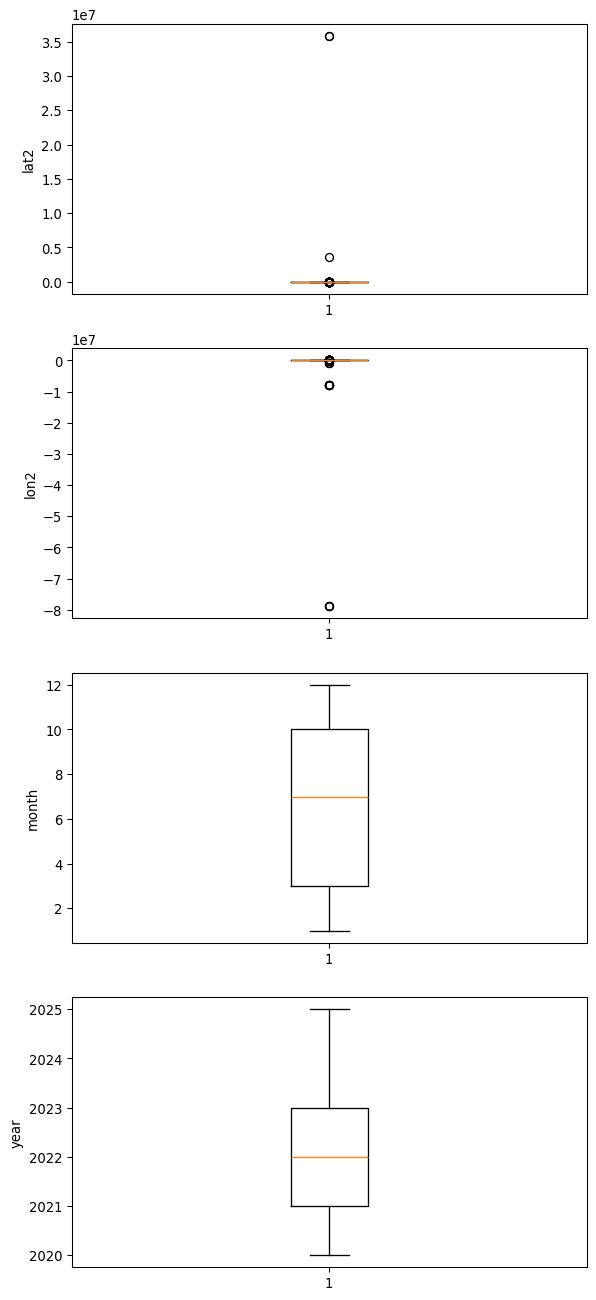

In [77]:
cols=['lat2','lon2','month','year']
fig, ax = plt.subplots(4,1,dpi=95, figsize=(7,17))
i = 0
for col in crash_df[cols]:
    ax[i].boxplot(crash_df[cols][col])
    ax[i].set_ylabel(col)
    i+=1
plt.show()

##### Removing outliers

In [80]:
cols = ['lat2','lon2']
Q1 = crash_df[cols].quantile(0.25)
Q3 = crash_df[cols].quantile(0.75)
IQR = Q3 - Q1

crash_df = crash_df[~((crash_df[cols] < (Q1 - 1.5 * IQR)) |(crash_df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

### Visualization

##### Distribution of Features

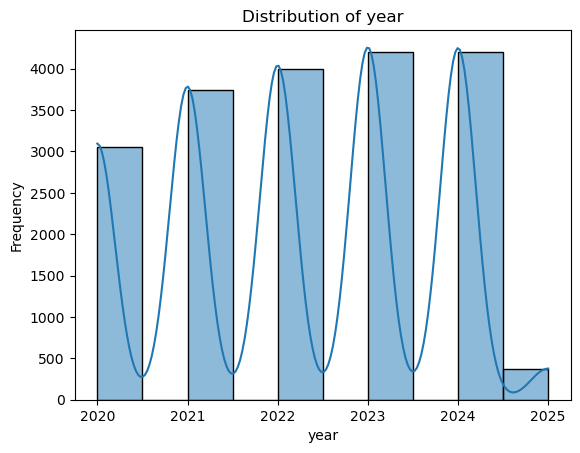

In [84]:
sns.histplot(data=crash_df, x='year', bins=10, kde=True) 
plt.title('Distribution of year')
plt.xlabel('year')
plt.ylabel('Frequency')
plt.show()

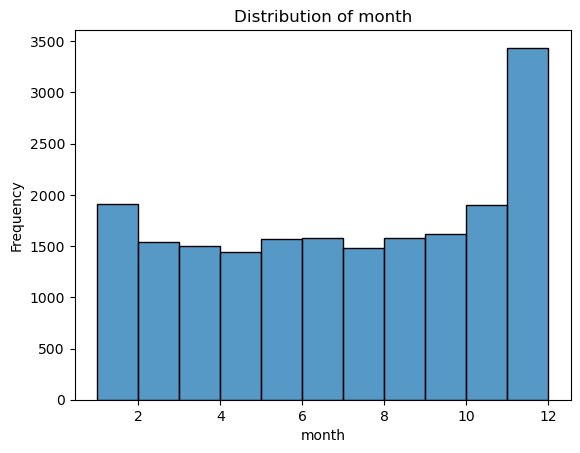

In [85]:
bins=[1,2,3,4,5,6,7,8,9,10,11,12]
sns.histplot(data=crash_df, x='month', bins=bins)
plt.title('Distribution of month')
plt.xlabel('month')
plt.ylabel('Frequency')
plt.show()

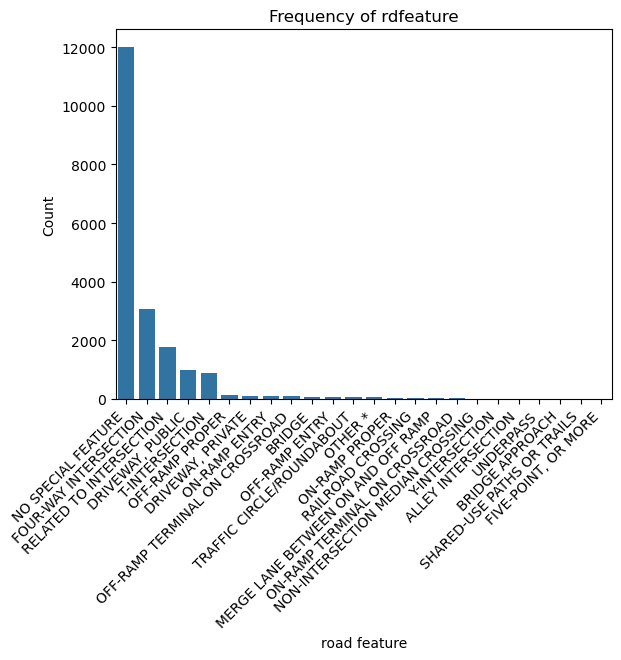

In [86]:
sns.countplot(data=crash_df, x='rdfeature', order=crash_df['rdfeature'].value_counts().index)
plt.title('Frequency of rdfeature')
plt.xlabel('road feature')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.show()

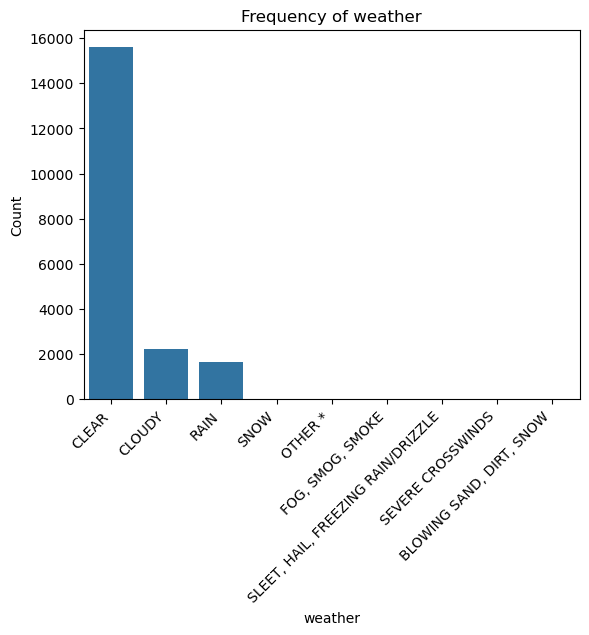

In [88]:
sns.countplot(data=crash_df, x='weather', order=crash_df['weather'].value_counts().index)
plt.title('Frequency of weather')
plt.xlabel('weather')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.show()

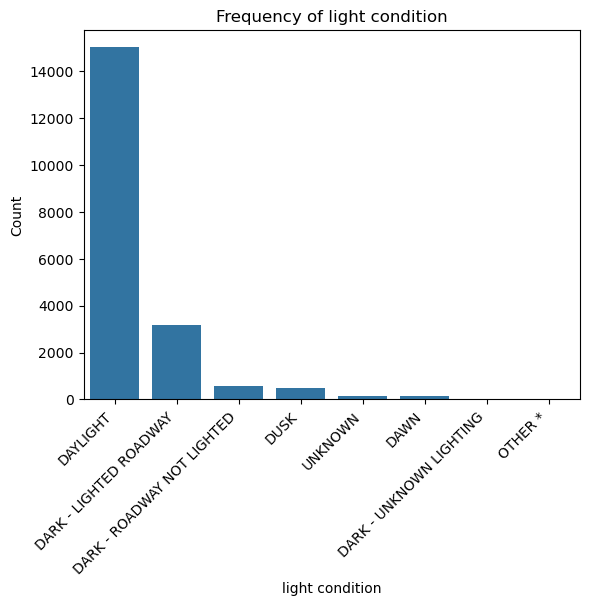

In [89]:
sns.countplot(data=crash_df, x='lightcond', order=crash_df['lightcond'].value_counts().index)
plt.title('Frequency of light condition')
plt.xlabel('light condition')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.show()

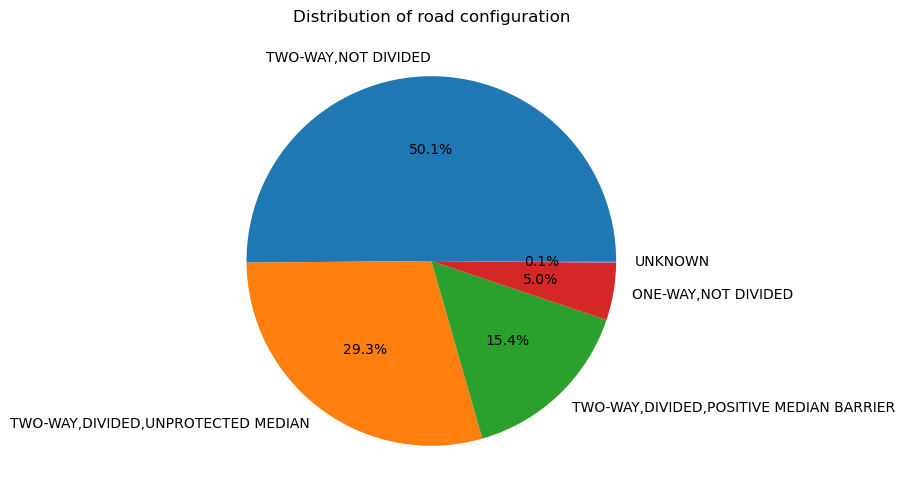

In [91]:
rdconfig_count = crash_df['rdconfigur'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(rdconfig_count, labels=rdconfig_count.index, autopct='%1.1f%%')
plt.title('Distribution of road configuration')
plt.show()

#### road related features vs injuries

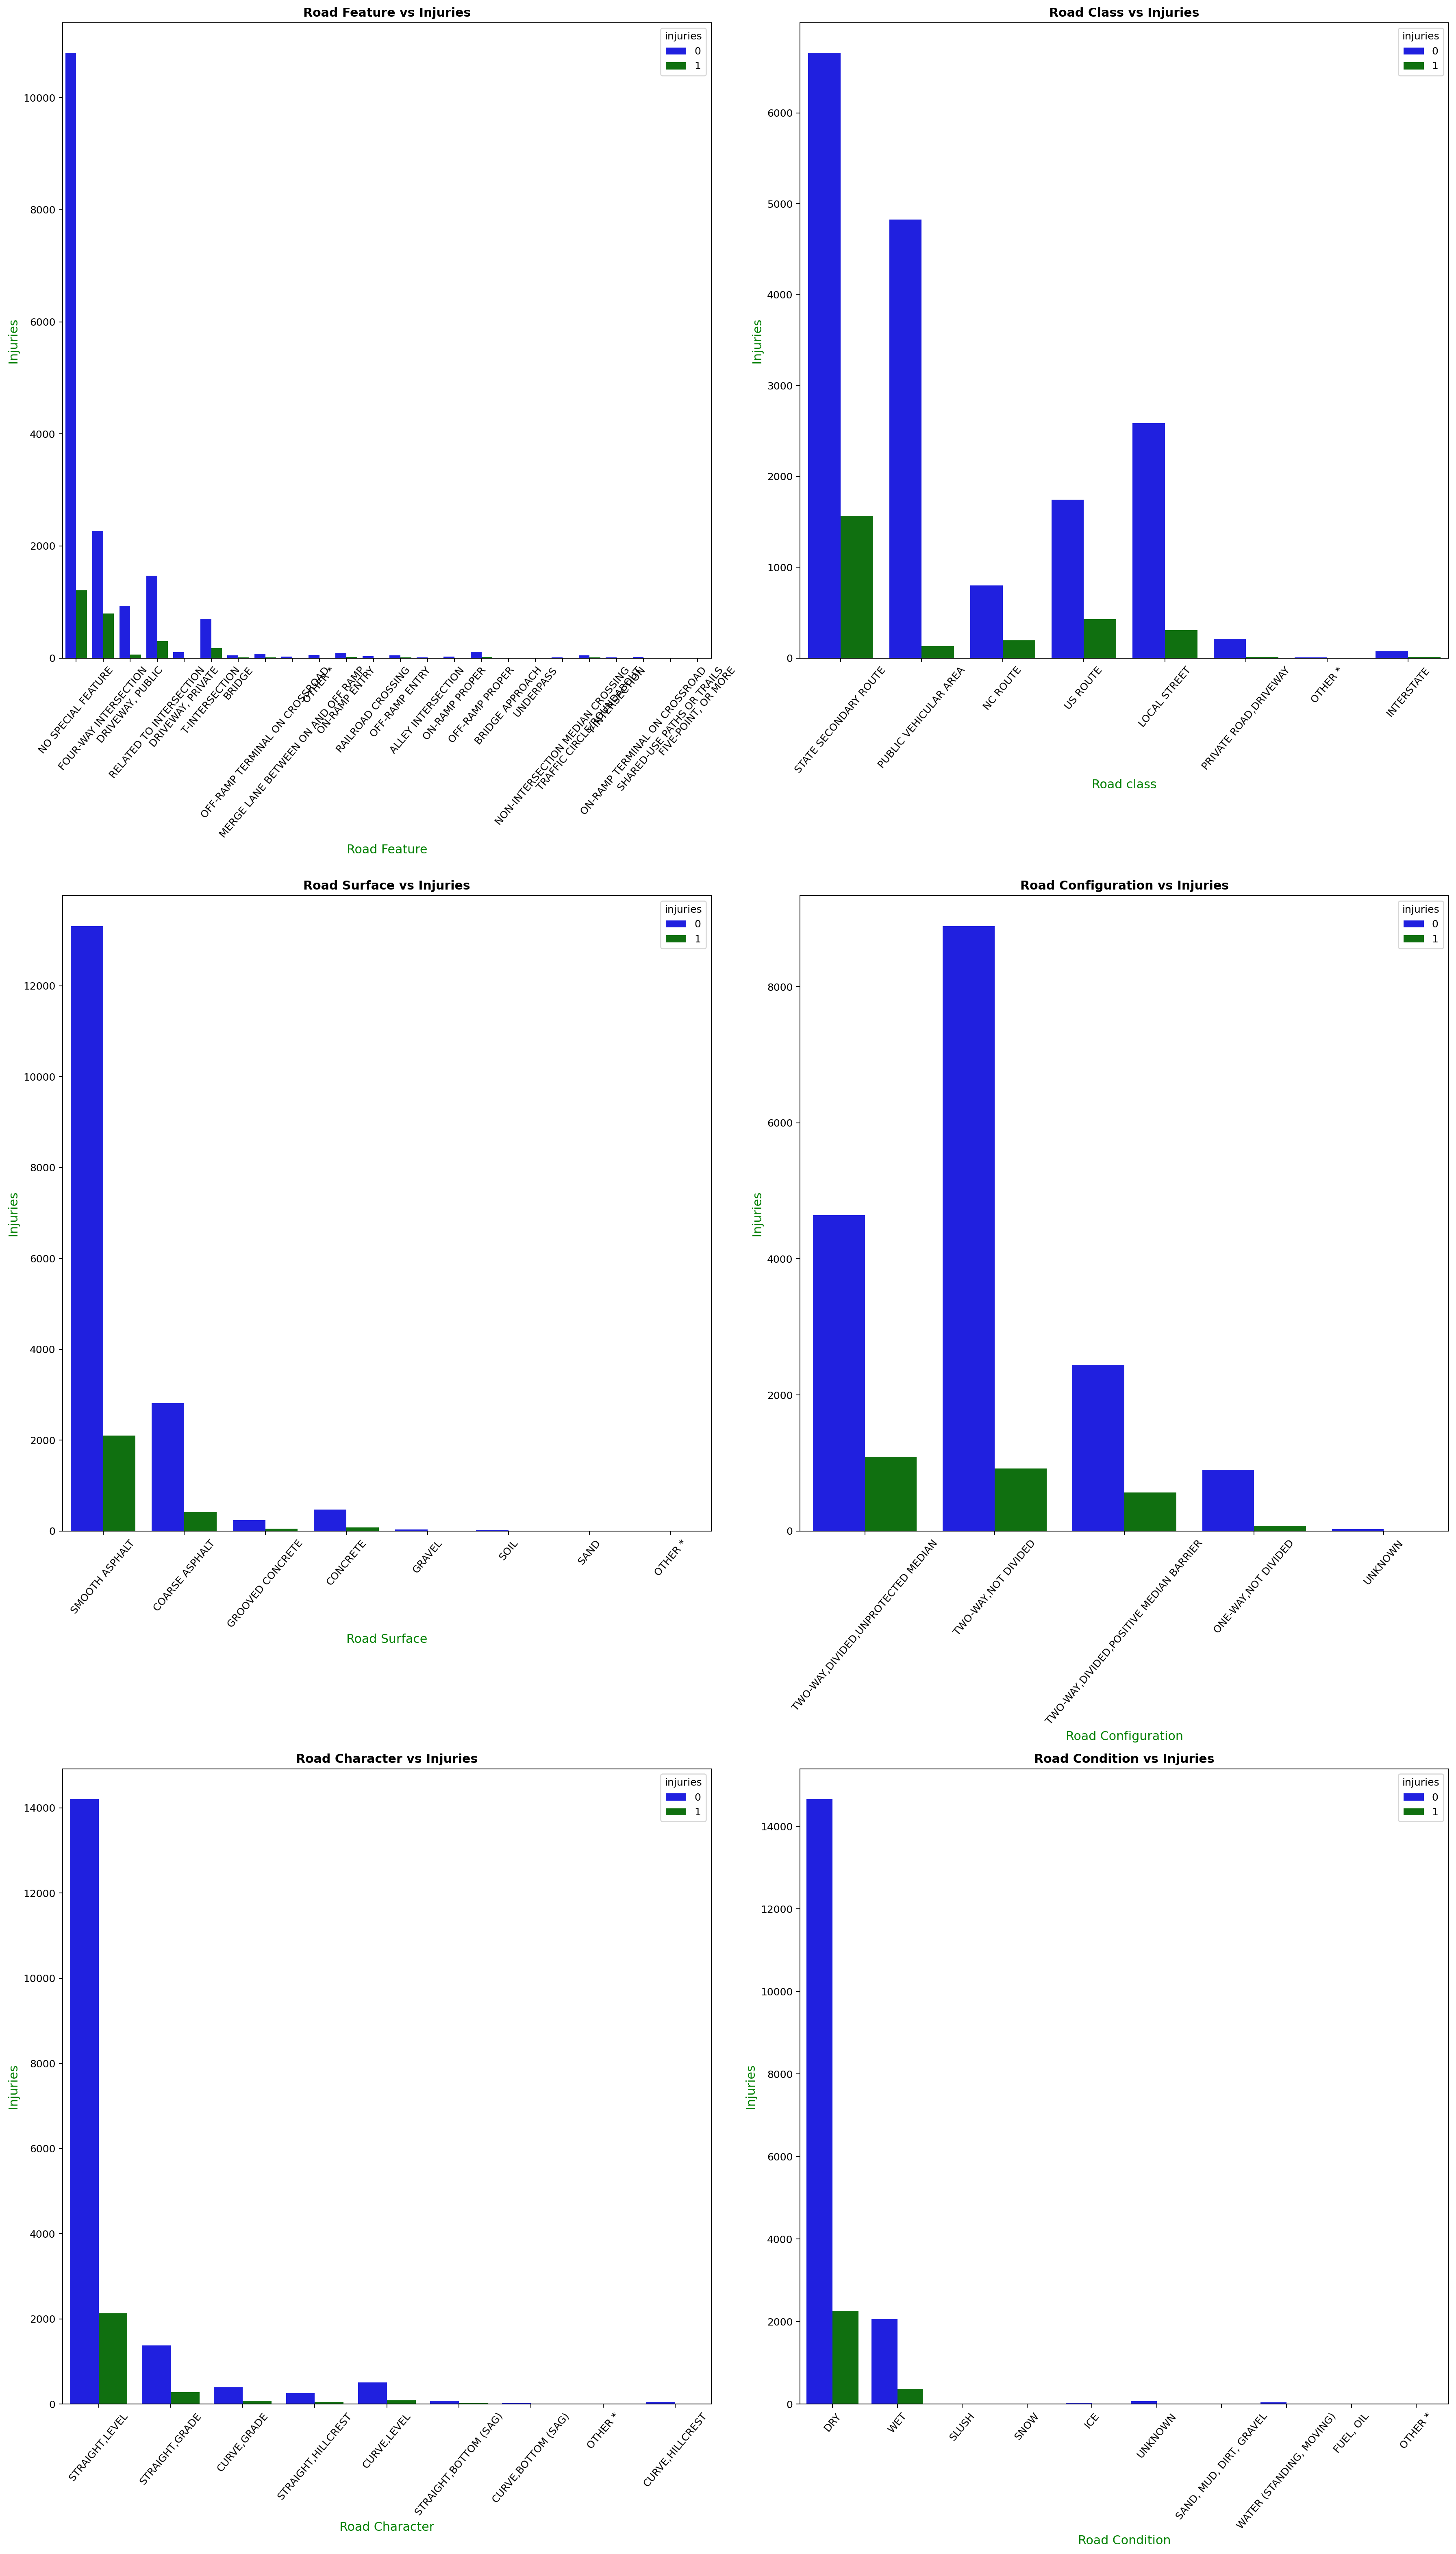

In [93]:
plt.figure(figsize=(20,35), dpi=180)
plt.subplot(3,2,1)
colors = ['blue', 'green']
sns.countplot(x='rdfeature',hue='injuries',data=crash_df, palette=colors)
plt.xticks(rotation=50)
plt.title('Road Feature vs Injuries', fontweight='bold')
plt.xlabel('Road Feature', color='Green',fontsize=12)
plt.ylabel('Injuries', color='Green',fontsize=12)


plt.subplot(3,2,2)
sns.countplot(x='rdclass',hue='injuries',data=crash_df, palette=colors)
plt.xticks(rotation=50)
plt.title('Road Class vs Injuries', fontweight='bold')
plt.xlabel('Road class', color='Green',fontsize=12)
plt.ylabel('Injuries', color='Green',fontsize=12)

plt.subplot(3,2,3)
sns.countplot(x='rdsurface',hue='injuries',data=crash_df, palette=colors)
plt.xticks(rotation=50)
plt.title('Road Surface vs Injuries', fontweight='bold')
plt.xlabel('Road Surface', color='Green',fontsize=12)
plt.ylabel('Injuries', color='Green',fontsize=12)

plt.subplot(3,2,4)
sns.countplot(x='rdconfigur',hue='injuries',data=crash_df, palette=colors)
plt.xticks(rotation=50)
plt.title('Road Configuration vs Injuries', fontweight='bold')
plt.xlabel('Road Configuration', color='Green',fontsize=12)
plt.ylabel('Injuries', color='Green',fontsize=12)


plt.subplot(3,2,5)
sns.countplot(x='rdcharacter',hue='injuries',data=crash_df, palette=colors)
plt.xticks(rotation=50)
plt.title('Road Character vs Injuries', fontweight='bold')
plt.xlabel('Road Character', color='Green',fontsize=12)
plt.ylabel('Injuries', color='Green',fontsize=12)


plt.subplot(3,2,6)
sns.countplot(x='rdcondition',hue='injuries',data=crash_df, palette=colors)
plt.xticks(rotation=50)
plt.title('Road Condition vs Injuries', fontweight='bold')
plt.xlabel('Road Condition', color='Green',fontsize=12)
plt.ylabel('Injuries', color='Green',fontsize=12)

plt.tight_layout()
plt.show()


#### weather,light and traffic vs injuries

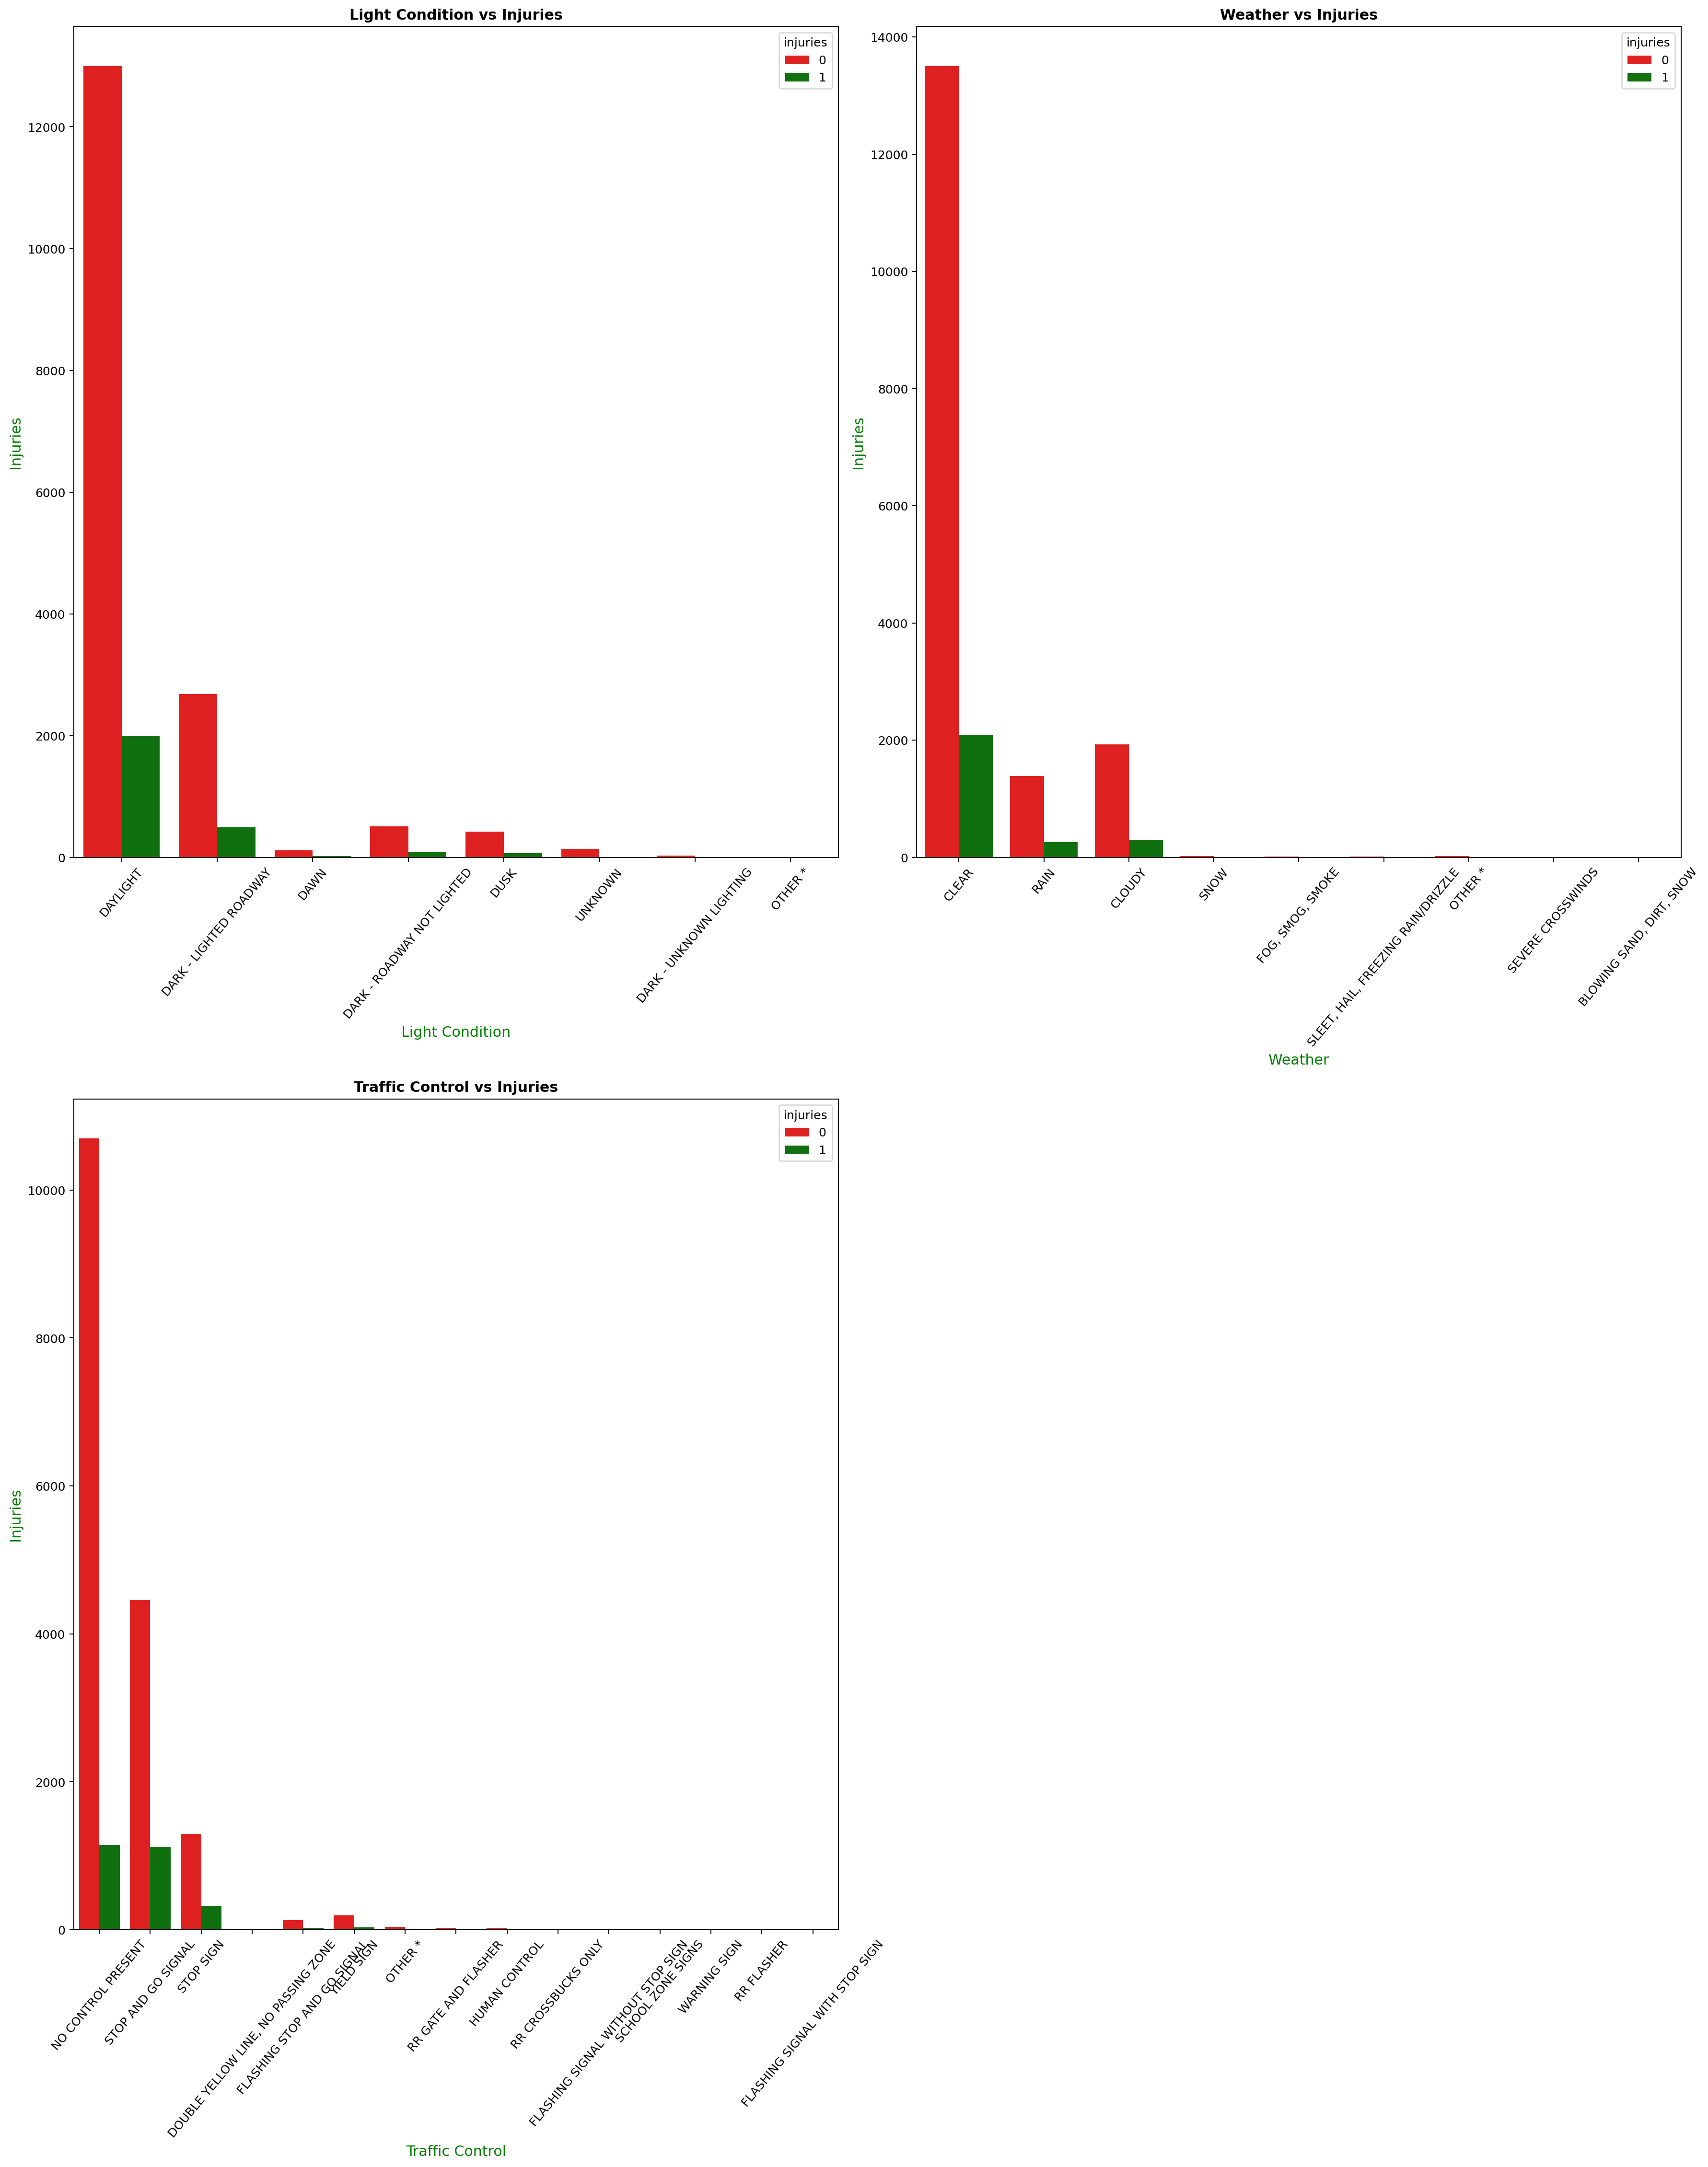

In [96]:
plt.figure(figsize=(20,35), dpi=180)
plt.subplot(3,2,1)
colors = ['red', 'green']
sns.countplot(x='lightcond',hue='injuries',data=crash_df, palette=colors)
plt.xticks(rotation=50)
plt.title('Light Condition vs Injuries', fontweight='bold')
plt.xlabel('Light Condition', color='Green',fontsize=12)
plt.ylabel('Injuries', color='Green',fontsize=12)


plt.subplot(3,2,2)
sns.countplot(x='weather',hue='injuries',data=crash_df, palette=colors)
plt.xticks(rotation=50)
plt.title('Weather vs Injuries', fontweight='bold')
plt.xlabel('Weather', color='Green',fontsize=12)
plt.ylabel('Injuries', color='Green',fontsize=12)

plt.subplot(3,2,3)
sns.countplot(x='trafcontrl',hue='injuries',data=crash_df, palette=colors)
plt.xticks(rotation=50)
plt.title('Traffic Control vs Injuries', fontweight='bold')
plt.xlabel('Traffic Control', color='Green',fontsize=12)
plt.ylabel('Injuries', color='Green',fontsize=12)

plt.tight_layout()
plt.show()

#### vehicle features vs injuries

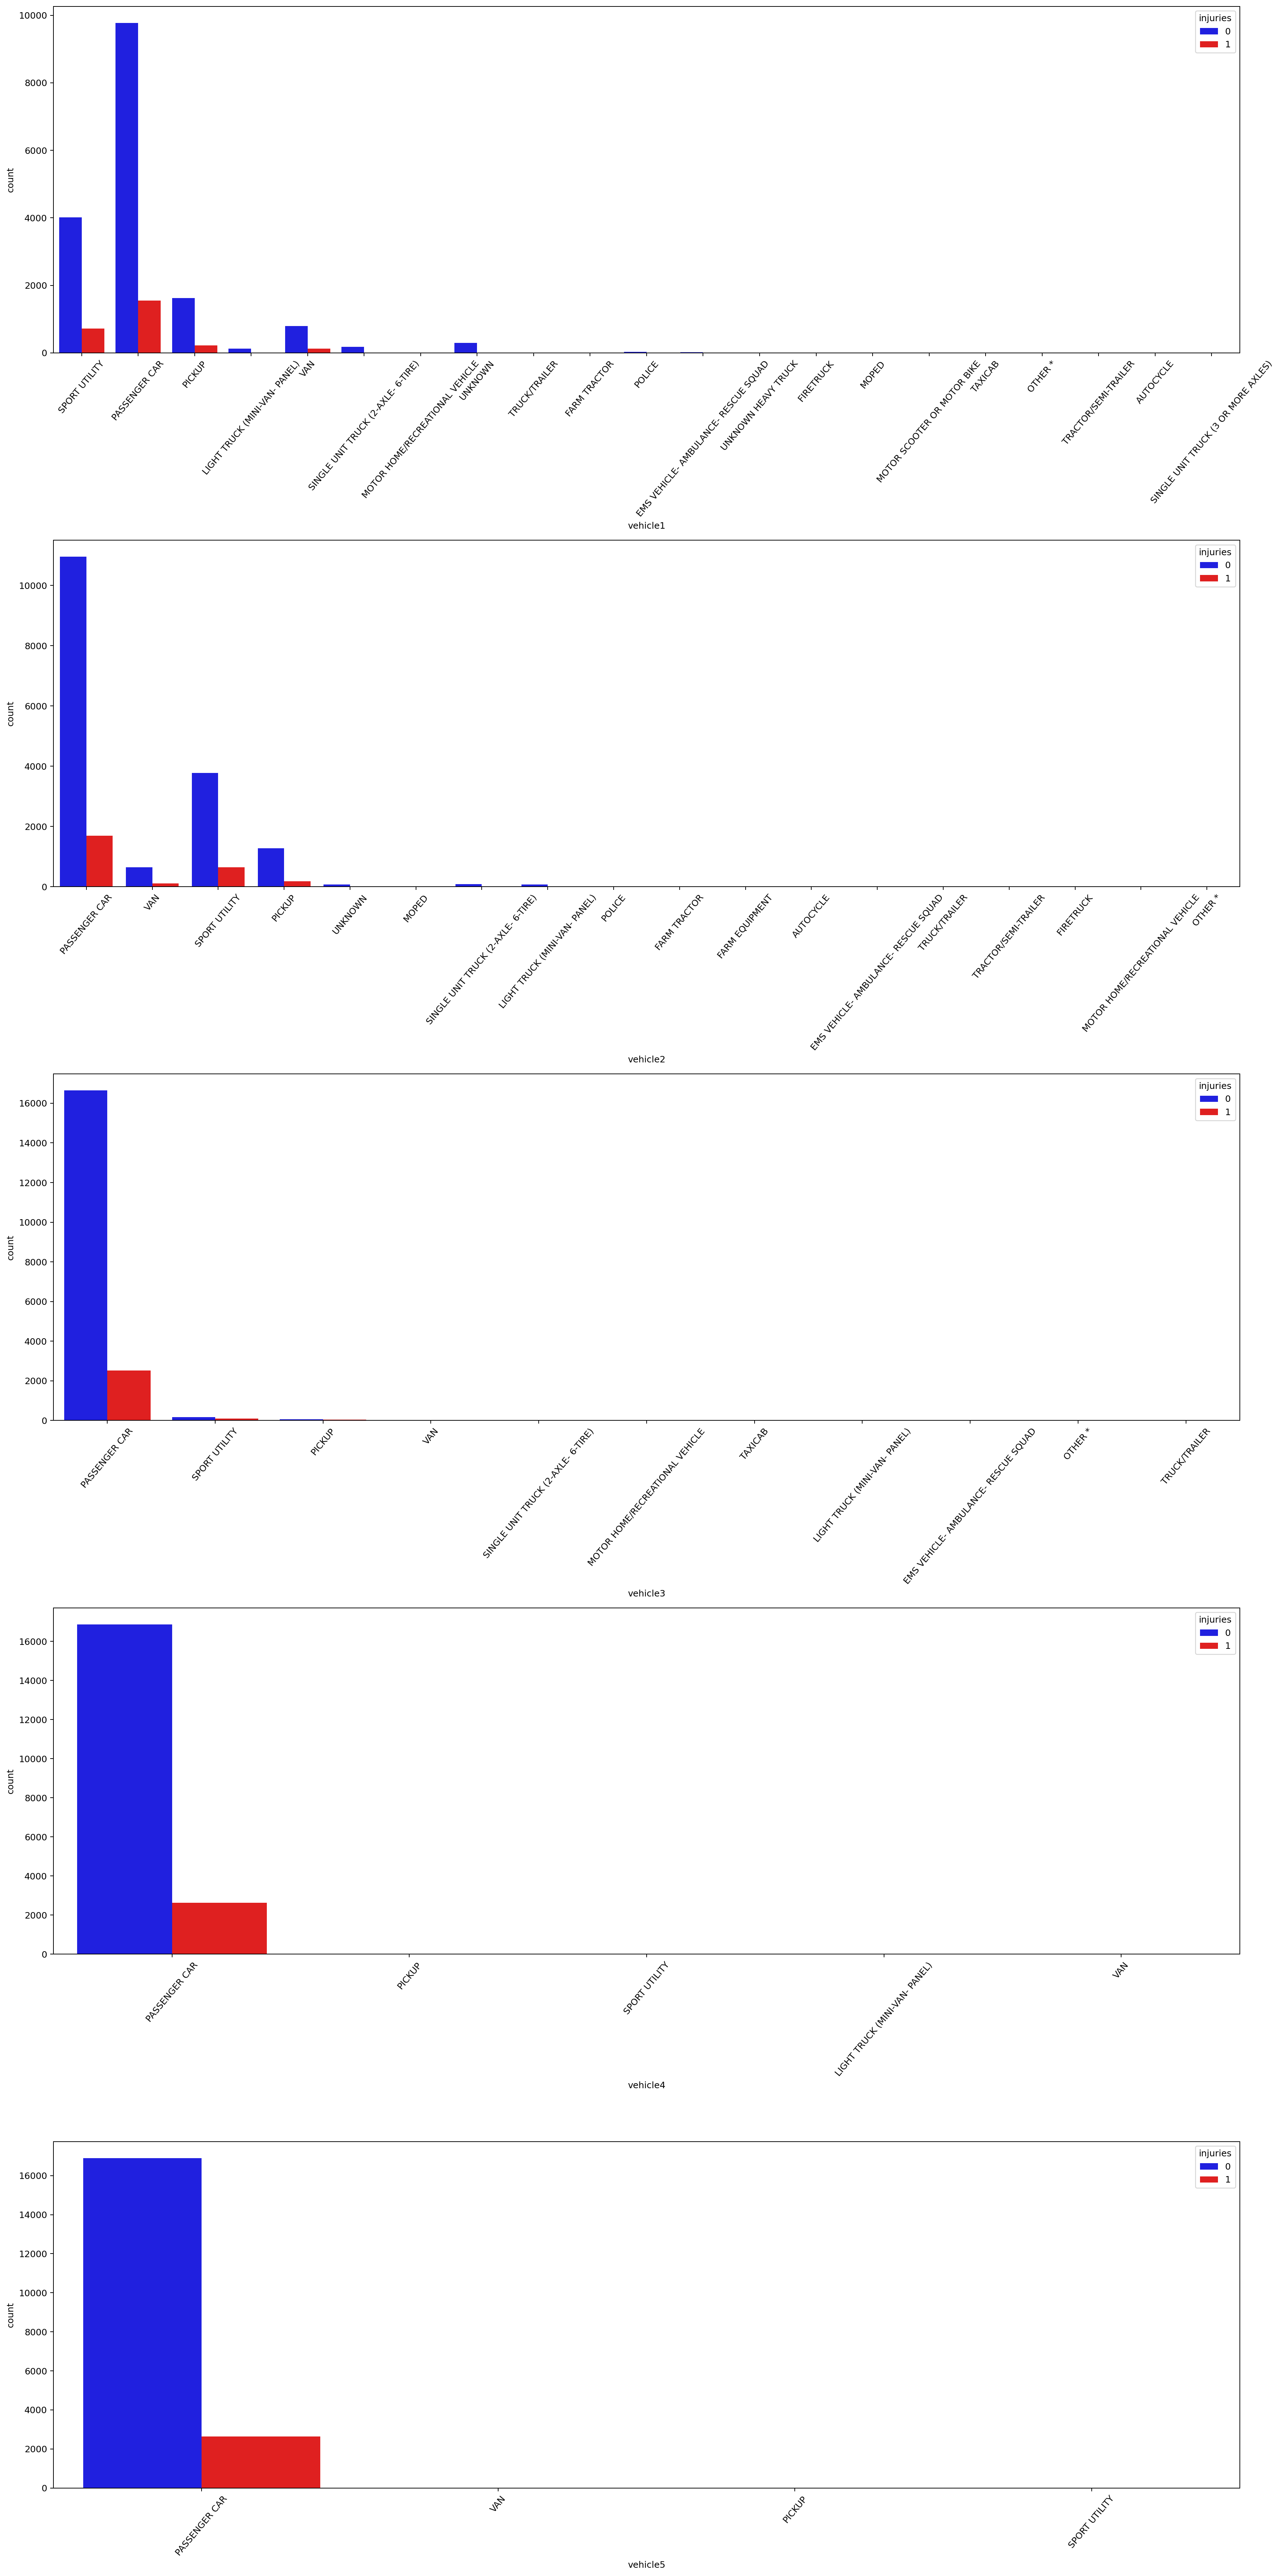

In [99]:
plt.figure(figsize=(20,40), dpi=180)
plt.subplot(5,1,1)
colors = ['blue', 'red']
sns.countplot(x='vehicle1',hue='injuries',data=crash_df, palette=colors)
plt.xticks(rotation=50)

plt.subplot(5,1,2)
sns.countplot(x='vehicle2',hue='injuries',data=crash_df, palette=colors)
plt.xticks(rotation=50)

plt.subplot(5,1,3)
sns.countplot(x='vehicle3',hue='injuries',data=crash_df, palette=colors)
plt.xticks(rotation=50)

plt.subplot(5,1,4)
sns.countplot(x='vehicle4',hue='injuries',data=crash_df, palette=colors)
plt.xticks(rotation=50)

plt.subplot(5,1,5)
sns.countplot(x='vehicle5',hue='injuries',data=crash_df, palette=colors)
plt.xticks(rotation=50)

plt.tight_layout()
plt.show()


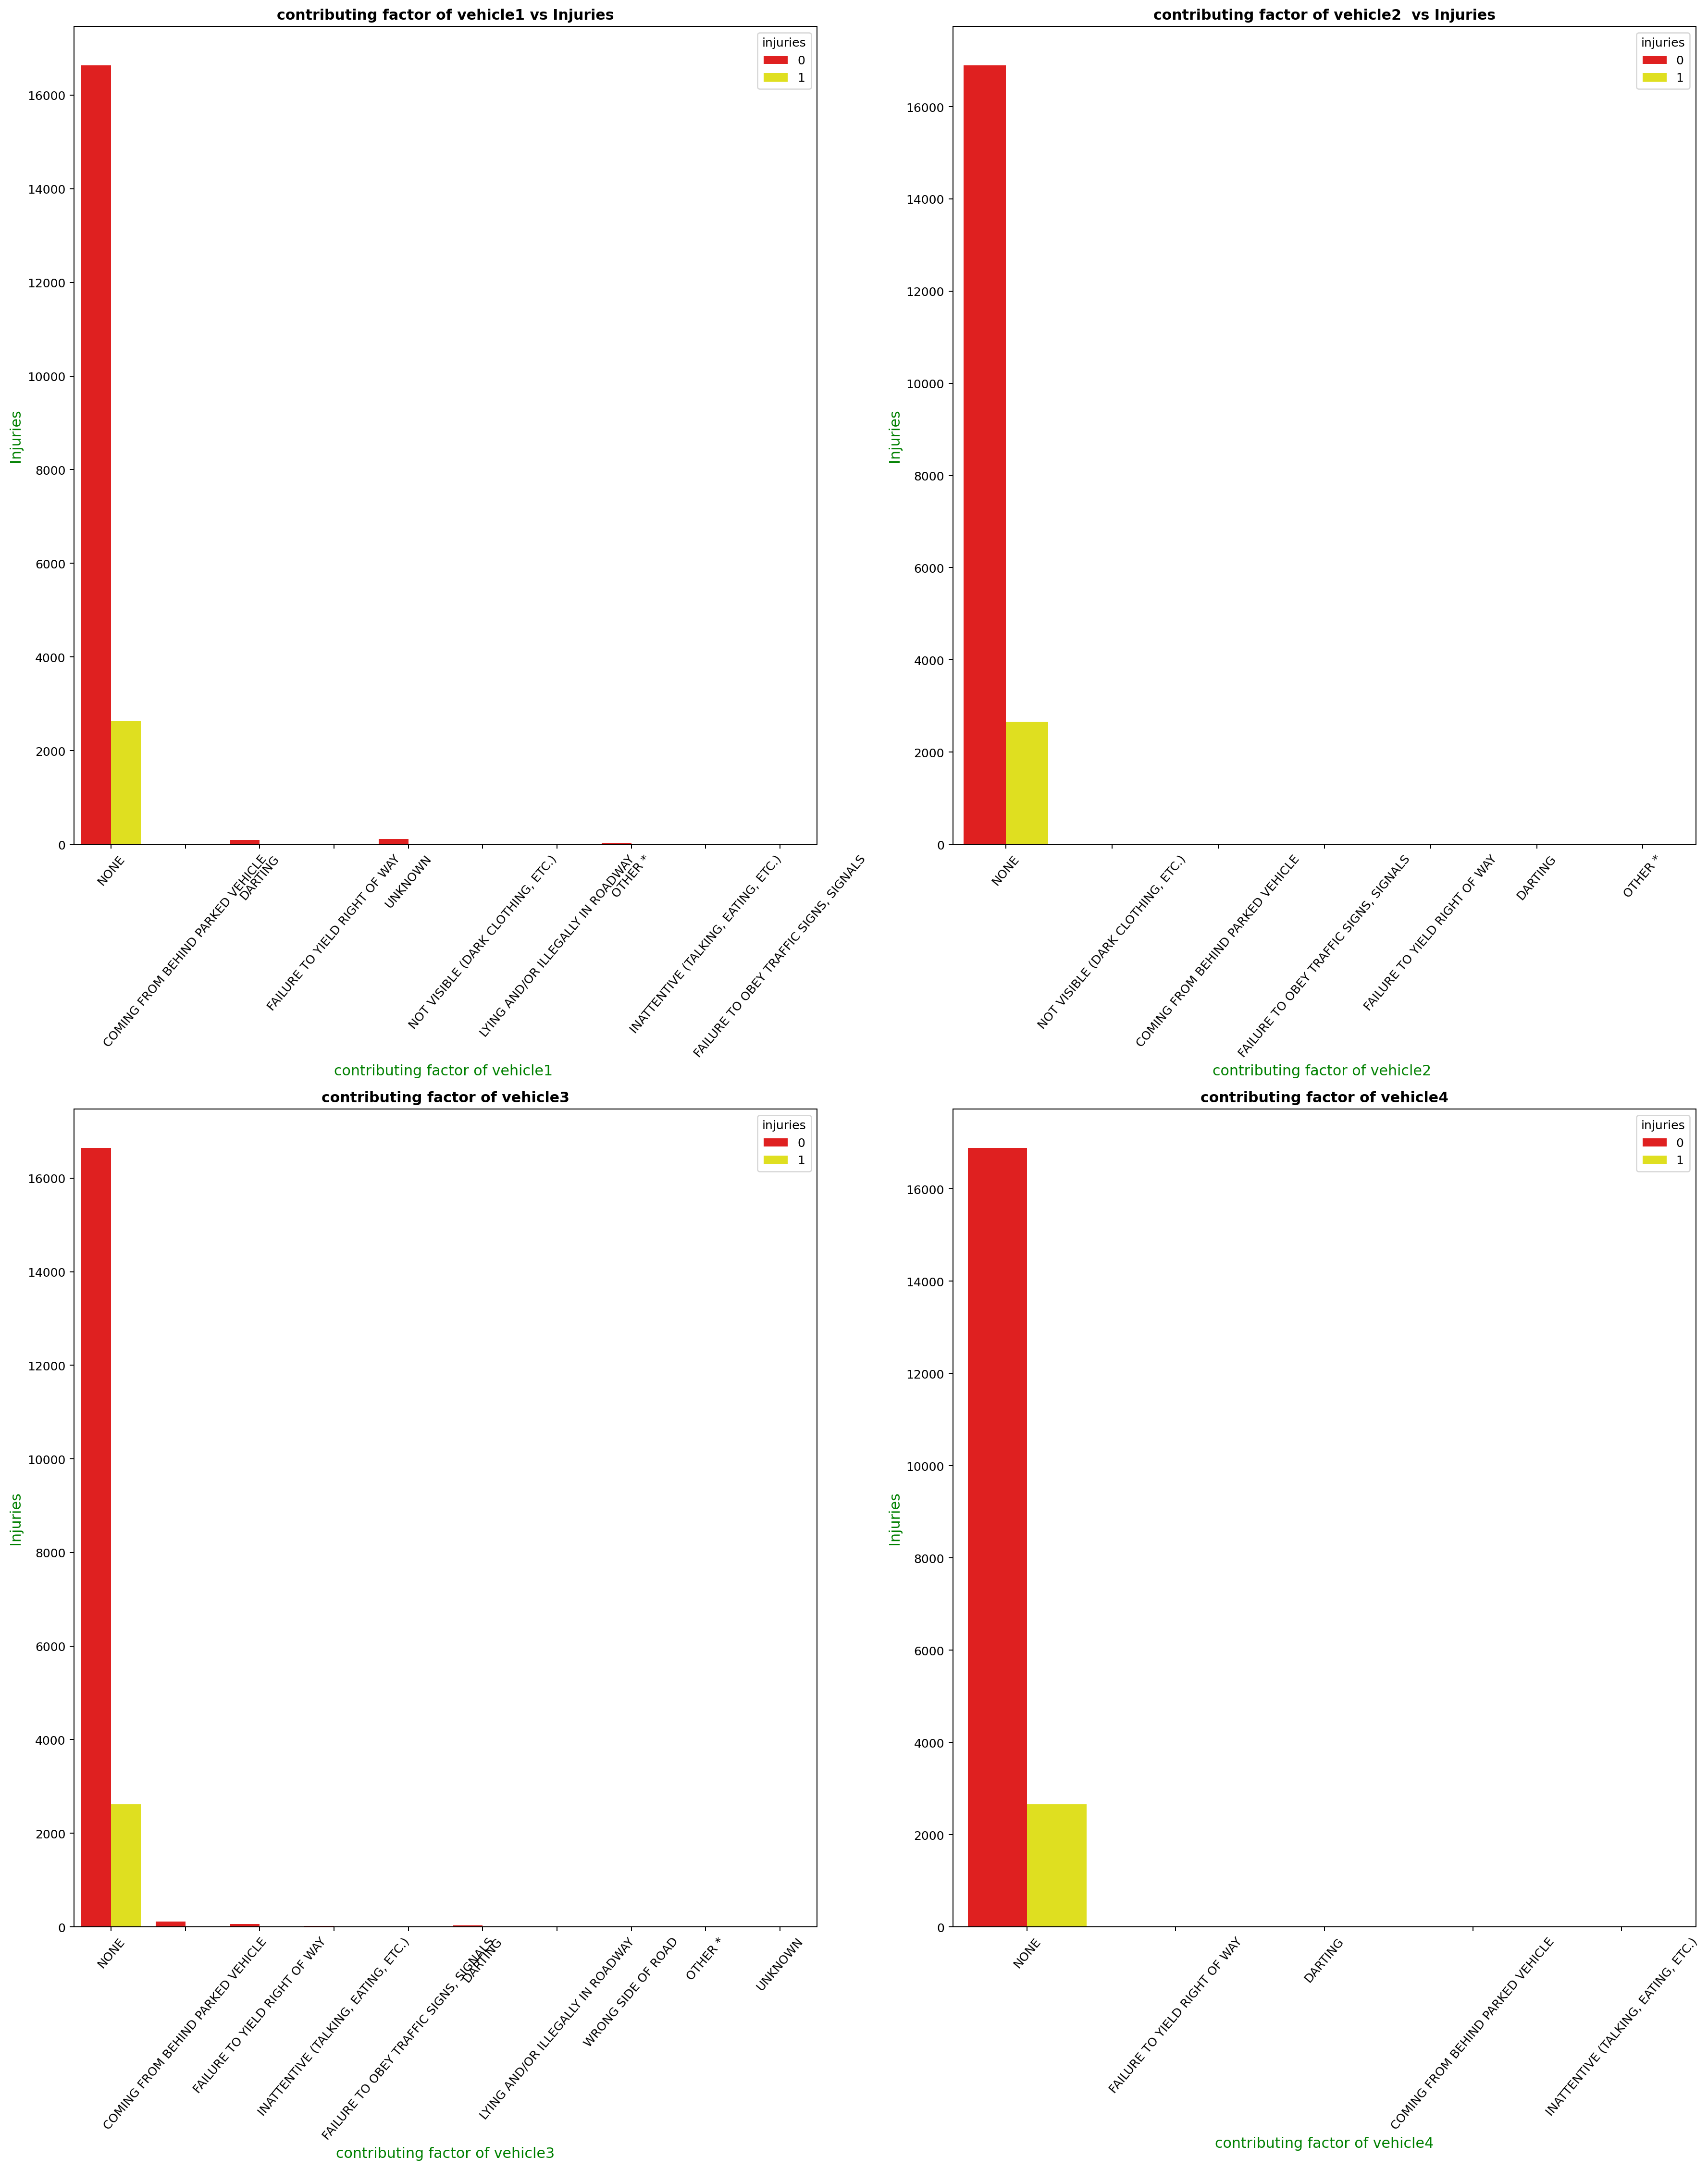

In [100]:
plt.figure(figsize=(20,35), dpi=180)
plt.subplot(3,2,1)
colors = ['red', 'yellow']
sns.countplot(x='contrcir1_desc',hue='injuries',data=crash_df, palette=colors)
plt.xticks(rotation=50)
plt.title('contributing factor of vehicle1 vs Injuries', fontweight='bold')
plt.xlabel('contributing factor of vehicle1 ', color='Green',fontsize=12)
plt.ylabel('Injuries', color='Green',fontsize=12)


plt.subplot(3,2,2)
sns.countplot(x='contrcir2_desc',hue='injuries',data=crash_df, palette=colors)
plt.xticks(rotation=50)
plt.title('contributing factor of vehicle2  vs Injuries', fontweight='bold')
plt.xlabel('contributing factor of vehicle2 ', color='Green',fontsize=12)
plt.ylabel('Injuries', color='Green',fontsize=12)

plt.subplot(3,2,3)
sns.countplot(x='contrcir3_desc',hue='injuries',data=crash_df, palette=colors)
plt.xticks(rotation=50)
plt.title('contributing factor of vehicle3', fontweight='bold')
plt.xlabel('contributing factor of vehicle3', color='Green',fontsize=12)
plt.ylabel('Injuries', color='Green',fontsize=12)

plt.subplot(3,2,4)
sns.countplot(x='contrcir4_desc',hue='injuries',data=crash_df, palette=colors)
plt.xticks(rotation=50)
plt.title('contributing factor of vehicle4', fontweight='bold')
plt.xlabel('contributing factor of vehicle4', color='Green',fontsize=12)
plt.ylabel('Injuries', color='Green',fontsize=12)

plt.tight_layout()
plt.show()

<Axes: xlabel='lat2', ylabel='lon2'>

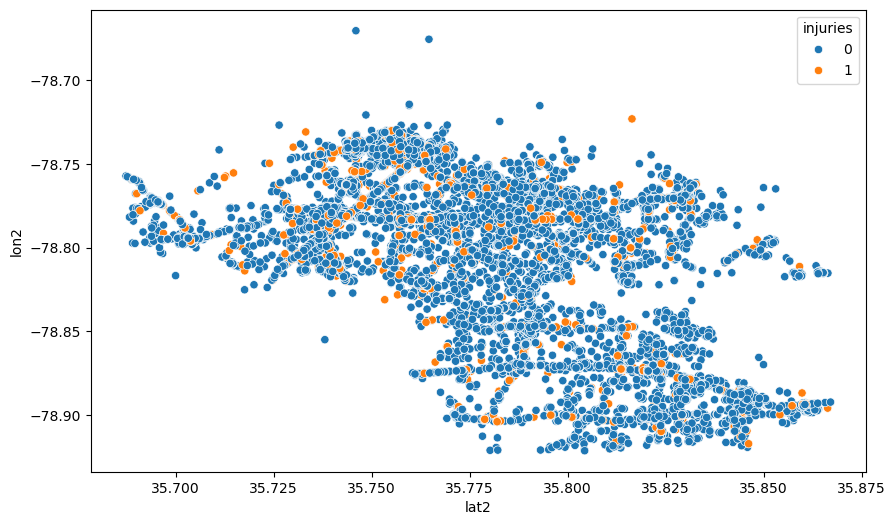

In [102]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=crash_df,x='lat2',y='lon2',hue='injuries')

In [104]:
X = crash_df.drop('injuries',axis=1)

In [105]:
y = crash_df['injuries']

In [106]:
# Separate numerical and categorical columns
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()

In [109]:
# Define preprocessors
num_transformer = StandardScaler()  # minmaxscaler for numerical features
cat_transformer = OneHotEncoder(handle_unknown='ignore')   # onehot encoder for categorical features

In [110]:
# Combine preprocessors in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

#### Splitting and scaling the dataset

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [113]:
y.value_counts()

injuries
0    16905
1     2658
Name: count, dtype: int64

here we can see that there is a class imbalance issue.to solve this we use SMOTEENN  
SMOTEENN: A Hybrid Sampling Technique
SMOTEENN (Synthetic Minority Over-sampling Technique + Edited Nearest Neighbors) is a hybrid approach used for handling class imbalance in machine learning datasets. It balances the dataset by combining:
SMOTE (Synthetic Minority Over-sampling Technique)
Oversampling the minority class by generating synthetic samples.
ENN (Edited Nearest Neighbors)
Undersampling by removing noisy and ambiguous samples from the majority class.
This method is useful when you have an imbalanced dataset (e.g., in this crash data where injury = 1 is much less frequent than injury = 0).

#### Balancing the dataset

In [126]:
from imblearn.combine import SMOTEENN
smotee = SMOTEENN(sampling_strategy='all')
X_train_balanced, y_train_balanced = smotee.fit_resample(X_train_scaled, y_train)

In [127]:
print(X_train_balanced.shape[0])

16173


In [128]:
print(y_train_balanced.shape[0])

16173


Now the dataset is ready to apply machine learning algorithms